## A classification task: record label recognition


In [1]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [2]:
# Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [3]:
import pandas as pd

In [4]:
#Read 
file = 'boc_120s/data_120s_only_9.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(2583, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.926209,13.066208,6.341759,0.191187,0.084679,25.695114,71.829575,2.878260,3.380372,21.690620,...,2.077109,0.851387,0.606503,0.603094,0.641322,0.600043,0.184244,434.193115,0.894638,suaraarchive
1,0.801614,12.663761,6.788875,0.196887,0.120882,68.848587,261.223206,3.911703,5.752195,28.230555,...,2.296762,0.789114,0.592504,0.616169,0.657935,0.554073,0.183572,434.193115,0.836342,suaraarchive
2,0.958840,15.589139,6.508586,0.194571,0.095030,29.897995,58.242626,3.597182,3.494998,20.671581,...,2.025024,0.732502,0.521595,0.536178,0.552483,0.614134,0.262139,434.193115,0.973183,suaraarchive
3,0.959844,16.034716,5.544224,0.186143,0.103511,63.320503,138.582840,4.787662,4.979610,32.127037,...,2.109402,0.685352,0.594553,0.583237,0.558795,0.545474,0.257773,434.193115,0.909519,suaraarchive
4,0.921126,14.520344,5.613762,0.258785,0.145858,43.360104,71.030136,4.291251,3.558462,15.687524,...,2.302892,0.839513,0.645181,0.642214,0.641815,0.516301,0.186468,434.193115,0.906785,suaraarchive


In [5]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

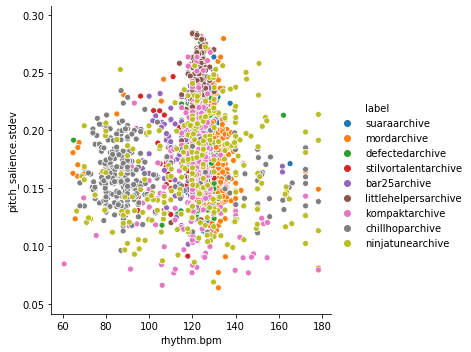

In [6]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

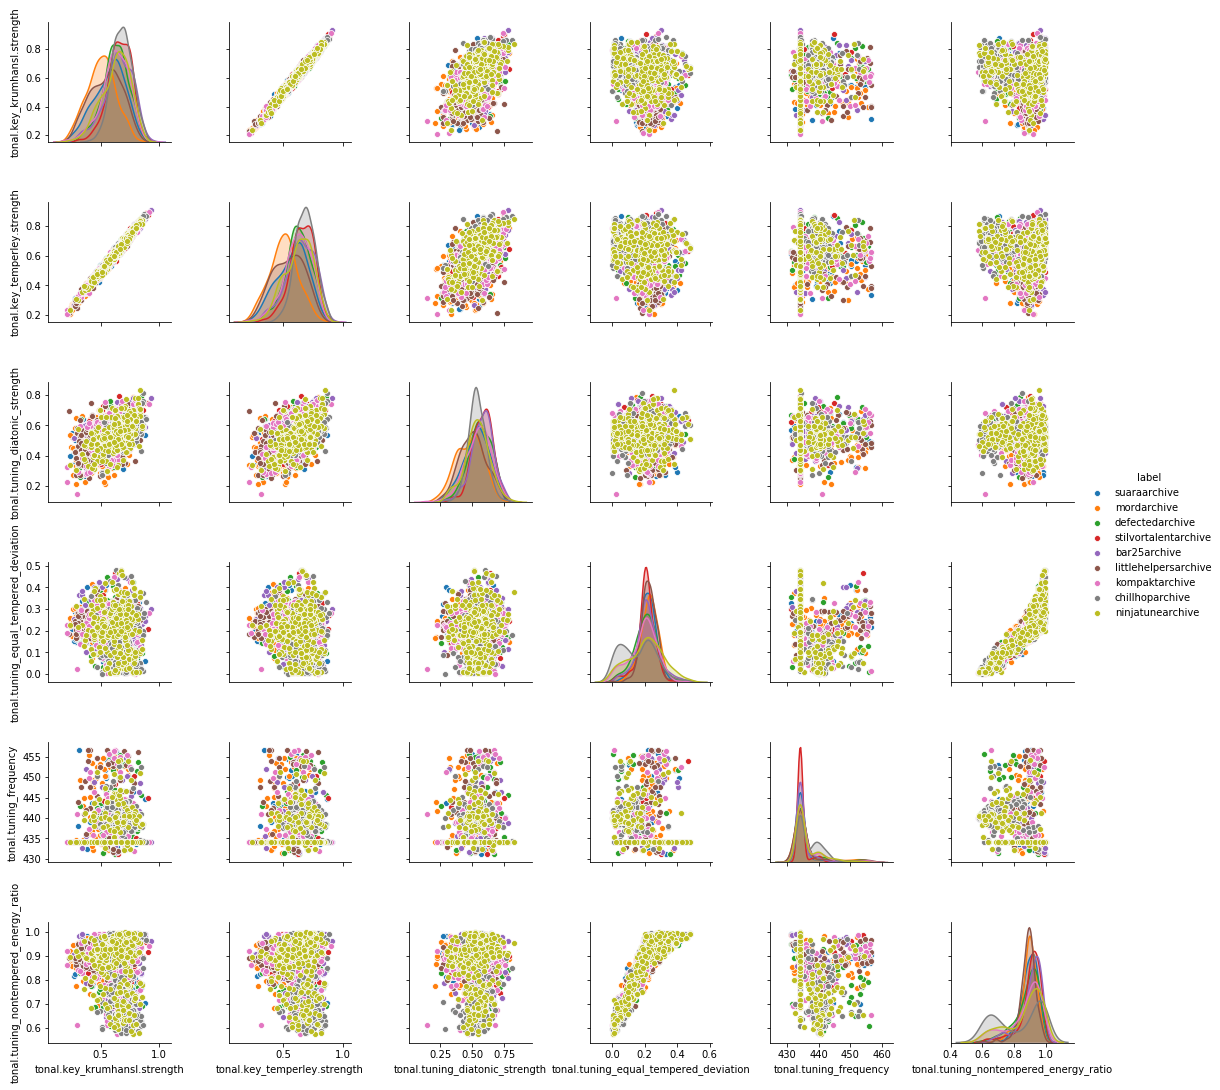

In [7]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [8]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,...,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,0.889970,14.883787,5.868700,0.243428,0.105734,53.799920,126.691895,3.878648,3.875653,16.634794,...,5.877730,2.134361,0.737948,0.610949,0.611574,0.608520,0.542322,0.208680,436.082754,0.880258
std,0.144775,2.360870,0.978432,0.064731,0.030087,52.102773,149.336394,1.573522,1.770775,7.729848,...,1.084320,0.332633,0.086301,0.126879,0.127560,0.126184,0.098338,0.079145,4.356978,0.091549
min,0.000030,7.074785,2.097549,0.092588,0.019667,0.462517,1.329556,-0.127956,0.492390,1.395237,...,3.553828,0.982740,0.431894,0.217340,0.211032,0.209378,0.148636,0.000000,431.193909,0.574467
25%,0.876218,13.223867,5.236501,0.197239,0.085947,22.236136,46.740496,2.777322,2.637735,10.960950,...,5.043578,1.906849,0.681524,0.531952,0.533333,0.527615,0.481911,0.174958,434.193115,0.853444
50%,0.943082,14.788955,5.882280,0.234076,0.102920,39.838318,86.761772,3.675003,3.601072,15.893243,...,5.706047,2.109727,0.737207,0.624815,0.623466,0.623213,0.545570,0.214270,434.193115,0.903709
75%,0.969953,16.397031,6.549443,0.280069,0.122284,67.868027,162.193390,4.799921,4.857785,21.243073,...,6.566083,2.354622,0.793552,0.702031,0.704478,0.702431,0.610839,0.255326,434.193115,0.942531
max,0.989369,22.913223,8.855705,0.513426,0.246347,650.951538,3523.732422,13.819847,19.197737,54.524734,...,10.421259,3.454323,1.071004,0.939667,0.932820,0.907584,0.832011,0.479446,456.570251,0.998950




### Preprocessing of the features

**Normalisation of the features**

In [9]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [10]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,...,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,0.899530,0.493041,0.558015,0.358429,0.379684,0.081996,0.035590,0.287257,0.180871,0.286838,...,0.338395,0.465945,0.478876,0.544917,0.554929,0.571667,0.576090,0.435253,0.192654,0.720383
std,0.146335,0.149060,0.144778,0.153815,0.132730,0.080098,0.042396,0.112815,0.094667,0.145491,...,0.157893,0.134583,0.135034,0.175653,0.176728,0.180726,0.143901,0.165076,0.171694,0.215673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.885630,0.388238,0.464469,0.248672,0.292398,0.033473,0.012892,0.208296,0.114691,0.180045,...,0.216930,0.373894,0.390591,0.435553,0.446531,0.455792,0.487689,0.364917,0.118189,0.657216
50%,0.953215,0.487054,0.560024,0.336205,0.367274,0.060533,0.024254,0.272656,0.166192,0.272881,...,0.313395,0.455978,0.477715,0.564114,0.571406,0.592712,0.580843,0.446911,0.118189,0.775629
75%,0.980375,0.588584,0.658744,0.445493,0.452695,0.103623,0.045669,0.353308,0.233377,0.373575,...,0.438629,0.555062,0.565877,0.671013,0.683644,0.706172,0.676353,0.532543,0.118189,0.867087
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.93615994 0.3782837  0.62801305 ... 0.38428438 0.11818908 0.75426074]
 [0.81022181 0.3528742  0.69417249 ... 0.38288404 0.11818908 0.61692732]
 [0.9691424  0.53757536 0.65269836 ... 0.54675457 0.11818908 0.93929746]
 ...
 [0.98394852 0.28218769 0.34462636 ... 0.59978668 0.11818908 0.96176263]
 [0.97287301 0.52373265 0.73177776 ... 0.19953585 0.61955523 0.41629224]
 [0.93812881 0.38149948 0.42292518 ... 0.20760358 0.21730733 0.35103626]]
Class of the first sample:  8


In [12]:
print(y.shape)

(2583,)


In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print k best features

                                     Specs       Score
49                 silence_rate_60dB.stdev  143.474757
48                  silence_rate_60dB.mean   83.321674
29         loudness_ebu128.momentary.stdev   72.098689
21                 erbbands_skewness.stdev   71.769894
75                  spectral_rolloff.stdev   68.993126
..                                     ...         ...
109  tonal.tuning_nontempered_energy_ratio   10.515860
86             rhythm.beats_loudness.stdev   10.434667
107  tonal.tuning_equal_tempered_deviation   10.077329
0                         average_loudness    9.652081
106         tonal.tuning_diatonic_strength    9.535434

[100 rows x 2 columns]


In [14]:
X_new = bestfeatures.fit_transform(x, y)

In [15]:
print ( X_new.shape)

(2583, 100)


In [16]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [17]:
#All output values: 
print(y)

[8 8 8 ... 6 6 6]


**Splitting data into train and test subsets**

In [18]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 20) #random_state = 20 or 42

In [19]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (2066, 100) , Size of train output vector:  (2066,)
Size of test features matrix:  (517, 100) , Size of test output vector:  (517,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 0.3}


**Testing the model**



In [21]:
y_pred = clf.predict(X_test)

In [22]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True,  True, False, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True,

In [23]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.6247582205029013


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

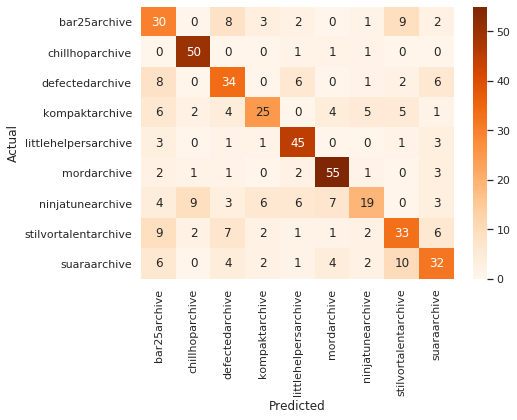

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.55      0.49        55
           1       0.78      0.94      0.85        53
           2       0.55      0.60      0.57        57
           3       0.64      0.48      0.55        52
           4       0.70      0.83      0.76        54
           5       0.76      0.85      0.80        65
           6       0.59      0.33      0.43        57
           7       0.55      0.52      0.54        63
           8       0.57      0.52      0.55        61

    accuracy                           0.62       517
   macro avg       0.62      0.63      0.62       517
weighted avg       0.62      0.62      0.62       517



In [27]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.37524177949709864

## Other ML Frameworks

In [ ]:
import warnings
warnings.filterwarnings('ignore')#suppress warnings
#importing various classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma = 1 / (x_train.shape[-1] * x_train.var())),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

names = ["KNN", "Linear SVM", "RBF SVM","Gaussian Process","Neural Net", "Naive Bayes"] 

#Creating empty list of scores for each classifier, we will append test results to these lists 
scores = {}
for name in names:
    scores[name] = []

#Let's split our data into test and train
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Let's run 10 random experiments, collect scores for each classifier 
num_tests = 10
for iteration_number in range(num_tests):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 1/num_tests, random_state = iteration_number)
    #normalisation of the data (learned from training data, applied to test data)
    scaler = StandardScaler().fit(x_train)
    norm_x_train = scaler.transform(x_train)
    norm_x_val = scaler.transform(x_val)
    
    # test over each classifier
    for name, clf in zip(names, classifiers):
        clf.fit(norm_x_train, y_train)#train
        score = clf.score(norm_x_val, y_val)#test
        scores[name].append(score)

for name, score in scores.items():
    print("{0}: acc = {1:1.2f}, +-{2:1.2f},\tvalues: {3}".format(name, np.mean(score), np.std(score), np.around(score, decimals = 2)))

### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler


In [21]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (2066, 9)
One-hot encoded y_test shape =  (517, 9)


**Let's define our deep learning architecture**

In [23]:
!pip3 install keras

You should consider upgrading via the '/mnt/vmdata/users/gnaimeh/geo/bin/python3 -m pip install --upgrade pip' command.


In [24]:
!pip3 install tensorflow

You should consider upgrading via the '/mnt/vmdata/users/gnaimeh/geo/bin/python3 -m pip install --upgrade pip' command.


In [31]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 55))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

You can have a look at the summary of the model

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               12210     
_________________________________________________________________
batch_normalization_3 (Batch (None, 110)               440       
_________________________________________________________________
activation_4 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 55)                6105      
_________________________________________________________________
batch_normalization_4 (Batch (None, 55)               

Let's pick an optimizer, compile the model and train the network

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['acc'])

In [35]:

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0, shuffle= True)

Testing the trained model

In [36]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0375885366240598
Test accuracy: 0.6382978558540344


It is a good and common practice to check the learning curves

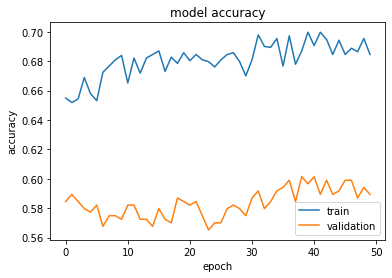

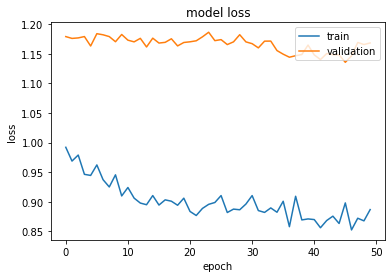

In [37]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [38]:
y=model.predict(X_test)

In [39]:
print(np.argmax(y))

577


In [40]:
y_pred = y.argmax(axis=1)

In [41]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.6382978723404256

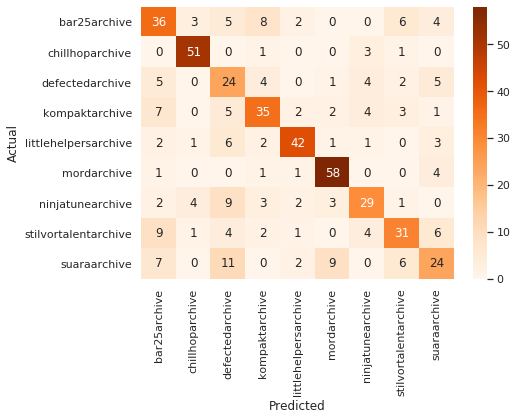

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54        64
           1       0.85      0.91      0.88        56
           2       0.38      0.53      0.44        45
           3       0.62      0.59      0.61        59
           4       0.81      0.72      0.76        58
           5       0.78      0.89      0.83        65
           6       0.64      0.55      0.59        53
           7       0.62      0.53      0.57        58
           8       0.51      0.41      0.45        59

    accuracy                           0.64       517
   macro avg       0.64      0.63      0.63       517
weighted avg       0.64      0.64      0.64       517



In [44]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.3617021276595745

In [37]:
print(y_pred.shape)

(517,)


In [73]:
print(y_test)

[5 8 1 7 8 7 2 1 3 0 6 3 6 4 3 7 2 4 2 7 6 5 8 6 4 0 8 8 7 5 0 6 4 0 0 8 2
 4 8 3 1 2 8 4 0 6 1 0 7 5 3 0 2 5 7 5 6 6 1 7 7 6 8 7 1 0 5 2 1 1 6 6 6 2
 7 1 4 8 6 7 0 5 3 8 3 2 3 6 0 7 7 2 8 4 5 2 0 2 4 1 4 1 0 0 0 7 4 2 4 3 1
 5 0 6 0 7 8 4 3 7 1 6 7 3 2 7 3 2 5 2 0 5 6 0 6 3 5 2 7 3 6 3 7 7 1 7 5 8
 1 7 5 3 8 1 0 6 1 1 4 7 8 3 6 5 8 5 8 0 1 1 0 4 8 3 4 6 7 3 2 4 6 7 3 2 8
 6 3 4 3 4 2 3 8 0 3 7 7 3 1 1 1 4 4 1 7 6 6 8 1 0 3 6 1 6 8 1 3 4 6 0 2 3
 7 1 1 6 2 8 3 2 4 6 7 5 0 0 8 4 5 0 8 2 8 0 7 3 2 0 5 7 0 6 0 4 2 5 0 4 1
 4 5 3 6 4 5 3 0 4 8 8 8 1 5 4 6 5 0 3 6 4 2 0 5 7 5 2 4 5 1 0 0 5 7 8 7 7
 0 0 0 1 4 2 7 2 7 0 2 8 8 7 4 2 4 6 8 3 1 1 3 2 4 5 4 3 5 2 0 3 1 3 0 0 3
 6 3 3 3 3 5 4 8 6 1 5 8 5 5 2 1 8 3 6 3 5 4 1 3 1 6 5 8 6 1 4 5 5 7 6 5 5
 1 6 6 8 7 7 2 4 3 5 1 0 8 5 0 5 3 1 0 3 8 3 2 6 4 2 5 0 7 0 7 1 1 5 7 8 7
 0 4 3 3 5 0 4 8 3 5 3 5 8 8 1 2 0 0 4 7 5 4 6 4 1 8 6 7 8 4 7 4 1 2 8 5 3
 7 7 4 1 0 5 0 4 4 8 5 4 6 8 0 0 5 1 3 4 6 7 8 5 6 5 8 4 3 3 7 0 0 4 7 6 5
 3 8 5 0 6 6 1 7 5 2 2 0 

In [74]:
count = 0 
for i in range (y_pred.shape[0]):
    if y_pred [i] == y_test [i]:
        count += 1
        

In [75]:
print(count/517)

0.6344294003868471


In [76]:
print(y)

[[7.72264600e-03 7.64336291e-05 1.03062391e-03 ... 8.39068294e-02
  9.91368294e-03 1.35260105e-01]
 [1.91599727e-02 2.06232071e-04 1.03328973e-01 ... 2.72252262e-02
  4.08640206e-02 5.67929983e-01]
 [1.34961009e-02 2.82302797e-01 1.75871670e-01 ... 4.50118273e-01
  1.73891187e-02 9.56285000e-03]
 ...
 [1.25787556e-02 9.73579764e-01 1.14343762e-02 ... 2.44490504e-02
  2.24601030e-02 1.15159154e-03]
 [2.35119164e-02 3.65924835e-03 1.01202905e-01 ... 5.55710614e-01
  3.41279209e-02 5.25440872e-02]
 [2.98719704e-02 2.23085284e-03 2.42609978e-02 ... 3.27951610e-02
  8.12559426e-02 7.55870163e-01]]


**Saving the model**

In [29]:
model.save("boc_120s/keras_model_120s.h5")
print("Model Saved")

Model Saved


## Model Prediction on New Data

In [79]:
#Read 
file = 'predict_data/data_pred.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(18, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.963493,17.411596,6.807801,0.262935,0.116092,81.227615,104.635643,6.074160,4.584791,11.562308,...,2.788476,0.702233,0.333988,0.334277,0.321422,0.352561,0.249118,434.193115,0.906822,suaraarchive
1,0.966686,17.324903,5.947535,0.254860,0.127702,97.824387,156.254852,6.335495,4.898880,17.555670,...,2.659520,0.724516,0.430702,0.431169,0.435791,0.620875,0.290523,434.193115,0.933793,suaraarchive
2,0.926988,14.274994,5.592249,0.289940,0.125390,31.102154,66.910263,3.391527,2.746675,10.291052,...,1.931845,0.771267,0.787204,0.784976,0.778738,0.636657,0.184869,434.193115,0.910034,ninjatune
3,0.802854,11.283667,5.499671,0.196944,0.097847,13.772067,36.369827,2.257152,2.278623,15.780928,...,2.267840,0.748025,0.732584,0.738017,0.722789,0.625408,0.172751,434.193115,0.871522,ninjatune
4,0.981240,21.086201,5.867064,0.237192,0.084536,69.157288,91.202240,6.546858,4.308962,12.151316,...,2.748346,0.863318,0.316979,0.319963,0.335770,0.357565,0.198698,452.370087,0.898852,mordarchive


In [80]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('boc_120s/keras_model_120s.h5')
# summarize model.
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               12210     
_________________________________________________________________
batch_normalization_1 (Batch (None, 110)               440       
_________________________________________________________________
activation_1 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 50)                5550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)               

In [81]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

In [82]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [83]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.789913,0.399720,0.431393,0.297945,0.435071,0.429440,0.350295,0.467138,0.481274,0.443428,...,0.395526,0.460386,0.517885,0.547646,0.555079,0.590416,0.595975,0.619808,0.108812,0.653151
std,0.235718,0.231374,0.268486,0.217212,0.295594,0.289030,0.275710,0.303624,0.285970,0.245136,...,0.241269,0.290495,0.341603,0.295015,0.298770,0.307961,0.276880,0.254219,0.254854,0.255504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.722453,0.264112,0.227756,0.157774,0.190426,0.183197,0.155538,0.265101,0.303089,0.269740,...,0.247038,0.225923,0.247295,0.330082,0.334384,0.366241,0.468514,0.509441,0.000000,0.463416
50%,0.864517,0.386193,0.477812,0.264227,0.473465,0.485448,0.280338,0.439548,0.493595,0.424164,...,0.375686,0.436257,0.492283,0.619567,0.631565,0.666798,0.664767,0.698559,0.000000,0.736947
75%,0.940041,0.487679,0.592479,0.377072,0.537311,0.594016,0.505153,0.601785,0.638057,0.569560,...,0.510449,0.619637,0.787371,0.771064,0.792313,0.829161,0.745997,0.751730,0.000000,0.827903
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.95075758 0.6251373  0.60957068 ... 0.8461676  0.         0.74506042]
 [0.95825781 0.61629338 0.23880357 ... 1.         0.         0.83211084]
 [0.86502049 0.30515857 0.08567861 ... 0.60746347 0.         0.75542668]
 ...
 [0.63790257 0.15942023 0.46768602 ... 0.74119744 0.         0.75162934]
 [0.87399776 0.30188802 0.54120445 ... 0.17098327 0.40350188 0.29782417]
 [0.9465051  0.23276052 0.22407407 ... 0.         0.29151494 0.        ]]
Class of the first sample:  8


In [85]:
print(y)
print(y.shape)


[8 8 6 6 5 5 1 1 2 2 7 7 0 0 4 4 3 3]
(18,)


In [86]:
import tensorflow as tf
import numpy as np

#y = [0 : 'bar25archive' , 1:"chillhoparchive", 3:"kompaktarchive", 4:"littlehelpersarchive", 8:"suaraarchive", 
             # 6:"ninjatunearchive", 5:"mordarchive", 7:"stilvortalentarchive", 2:"defectedarchive"]

    



#Able to load a .model, .h3, .chibai and even .dog
model = tf.keras.models.load_model("fulltracks/kerasmodel_full_9RL.h5")
predictions = model.predict(x)  # yhat = predictions
print("Predictions:", predictions*100)


Predictions: [[1.6019285e+00 4.9602985e-02 8.7515984e+00 1.5059412e+00 1.0719299e-01
  7.9576308e-03 6.4735413e-01 8.7702360e+00 8.6339439e+01]
 [7.2787194e+00 2.1928251e-01 7.2458386e-01 5.6342483e-01 1.8589497e-01
  2.8344989e-02 1.8319786e-01 1.1820248e+01 7.3496338e+01]
 [1.1102557e-01 8.4769878e+00 3.9094388e-01 3.3309162e-01 2.6823026e-03
  7.0410869e-03 6.2699699e+01 9.0761185e-01 1.2311935e+01]
 [4.4924021e-02 5.1128864e-02 2.5632977e-01 2.0384431e+00 8.2453938e-05
  1.2672499e-03 7.8713730e+01 2.4919062e+00 3.6233485e+00]
 [7.2035193e-01 5.7964483e-03 1.2234142e+01 2.8999448e-01 2.6114583e-01
  9.7540646e+00 3.0958772e+00 4.1576326e-01 3.6500801e+01]
 [3.3196211e-01 1.9899011e-02 4.0770618e+01 9.8786354e-01 1.5966892e-01
  3.8601756e-01 7.0343199e+00 1.7799586e+00 6.2928951e+01]
 [9.9873543e-02 9.7628319e+01 1.7842650e-02 1.0428131e+00 5.0964952e-02
  6.8488717e-02 1.7515966e+01 1.8773377e-01 6.8739057e-02]
 [1.9490242e+00 9.4941833e+01 7.5563788e-02 1.1857775e+01 5.8843493e-0

In [87]:
xnew = scaler.transform(x)
# make a prediction
ynew = model.predict(xnew)
# show the inputs and predicted outputs

for i in range(len(xnew)):
	print("X=%s, classes=%s, Predicted=%s" % (xnew[i], ynew[i]*100, np.argmax(ynew[i]*100)))

X=[ 0.36159297  0.88993525  0.33808765  0.19300759  0.06186817  6.24194612
  3.60842074  5.35280332  3.25224097 -0.26754933 -1.46650001  1.1436382
 -1.28858485 -0.76502217 -2.01717686 -2.06981057 -1.08281942  1.2494164
  0.88556576  2.05020976  1.11347583  1.89316664  5.54140645  3.99650786
  2.91238076  0.05739051  0.70750378  0.71479151  0.88207771  1.5481121
  0.58060856  2.27435082  1.22251018  3.19624364 -0.45824537  1.81054543
 13.89585102 22.25621851  5.48615581 11.03466229  1.10211223  0.65036608
  0.13584258  0.88363164  0.42847672 -0.68616086 -3.97423904  0.87633062
  1.15047681  0.21474215  0.95093549  1.71759921  0.18316546  1.48175547
 -3.92261806  3.1286564   3.86246929  3.0592275   2.33206968  1.10578625
  3.94996897  2.9915986   0.69325997 -0.869319    2.07555577  6.85022023
  1.39723388  1.82508133  1.53292841  1.11602232 -0.34415191 -0.1403745
  2.51832082  2.67699651  0.47578453  1.36736174 -0.50699079 -0.20176105
  2.92882818  2.35671189  2.79646472 -0.84056696  1.1

In [89]:
#thats with 110, 50, 9
score = model.evaluate(x, ynew, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26643693447113037
Test accuracy: 0.5
